# Imputing missing values in python:

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data set:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualize the data:

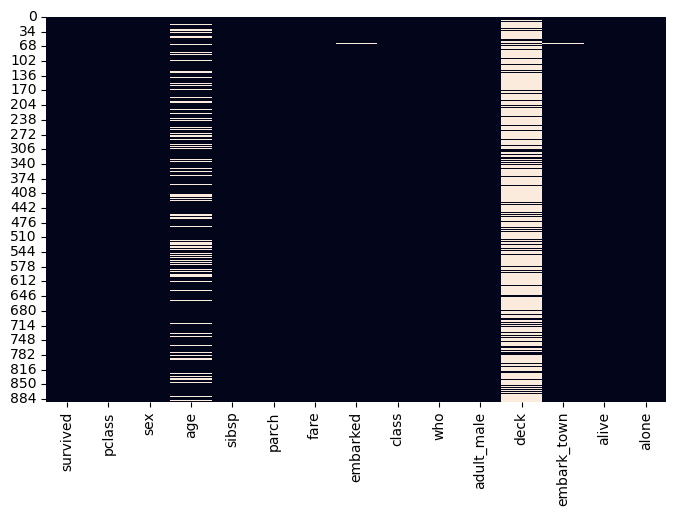

In [21]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [22]:
# Check the number of missing values in each column:
data.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [23]:
print(f"Percentage of missing values in each column:\n{round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)}")

Percentage of missing values in each column:
deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64


# Missingno Library:

###### Using missingno library to handle missing vlaues in data:

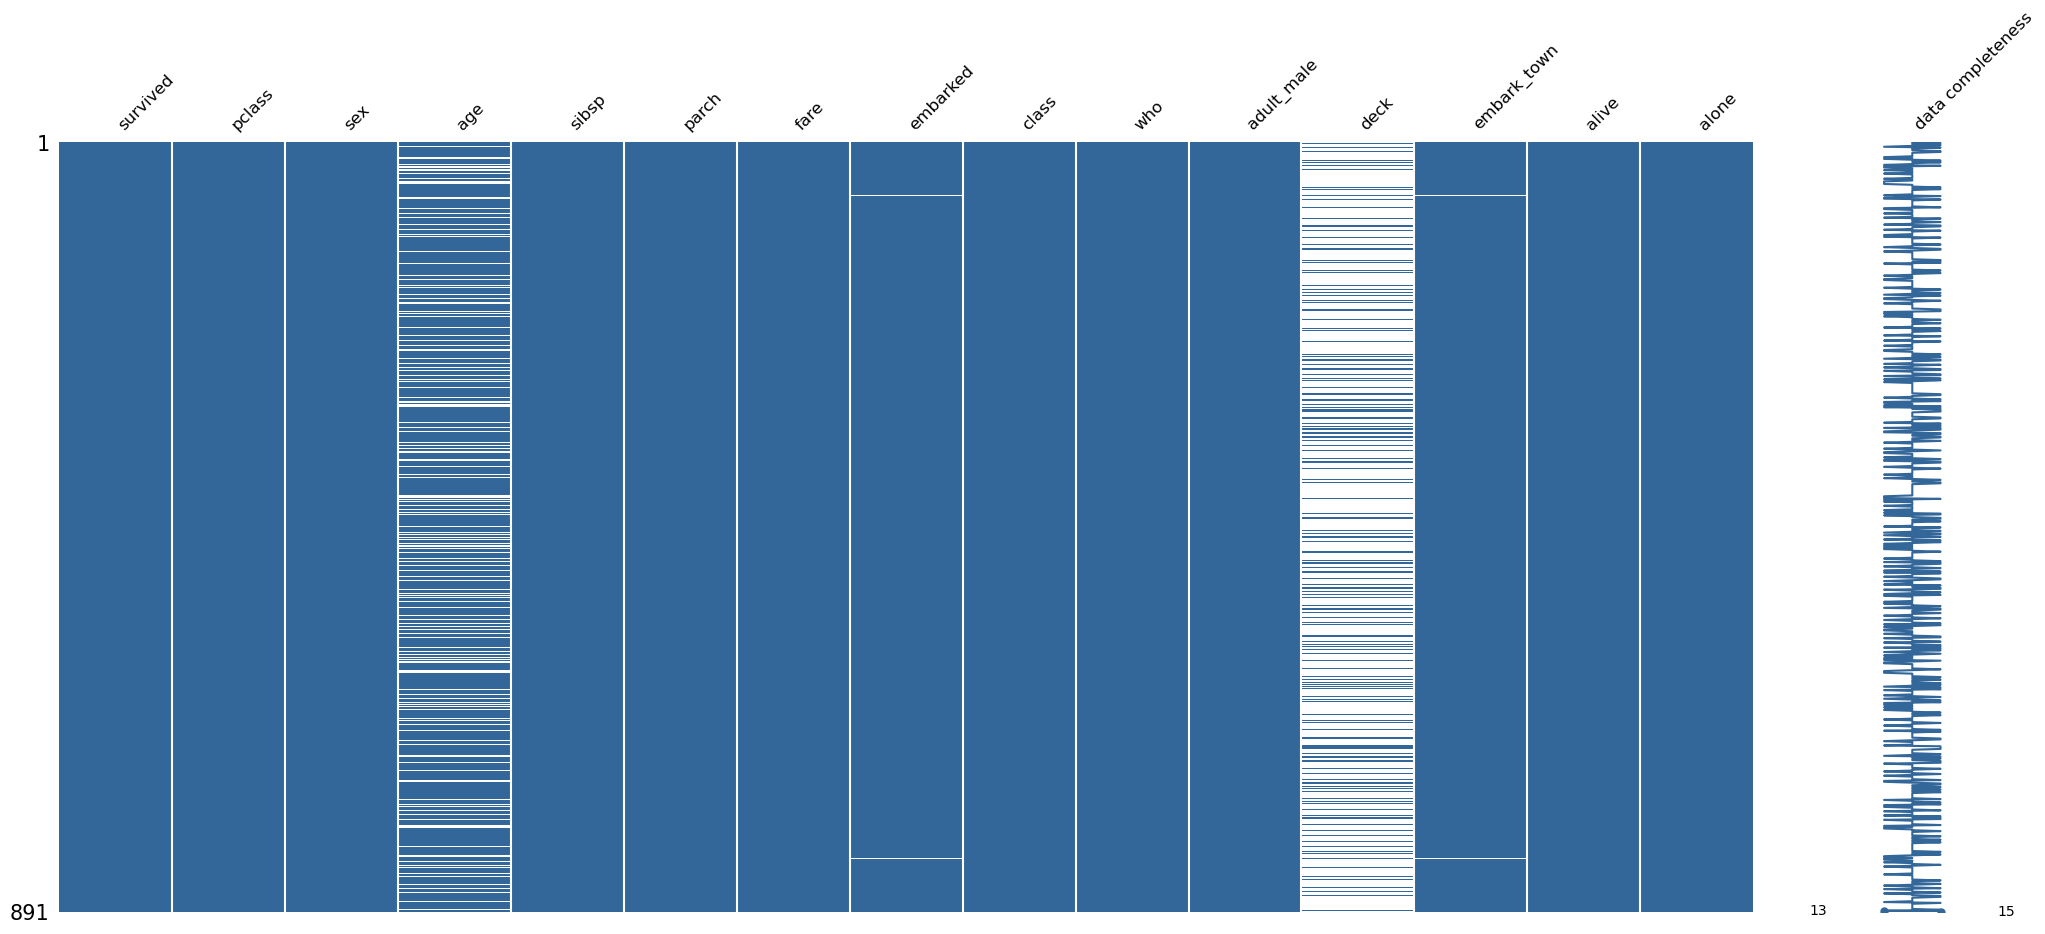

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the data set
data = sns.load_dataset('titanic')

# Visualize the data
msno.matrix(data, labels=True, fontsize=12, width_ratios=(10, 1), color=(0.2, 0.4, 0.6))
plt.show()


In [25]:
# Drop deck column:
# data=data.deop('deck', axis=1)
data.drop('deck', axis=1, inplace=True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


# Mean Imputation:

In [30]:
# Imputing missing values with mean:
data['age'] = data['age'].fillna(data['age'].mean())

# Check the number of missing values in each column:
data.isnull().sum().sort_values(ascending=False)


embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# Median Imputation:

In [31]:
# Impute Missing values with Median:
# Load the data set:
df = sns.load_dataset('titanic')

df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [33]:
# Drop deck column:
df.drop('deck', axis=1, inplace=True)

In [34]:
# Now impute missing values with median:

df['age'] = df['age'].fillna(data['age'].median())

# Check the number of missing values in dataset:
data.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# Mode imputation:

In [35]:
# Now impute missing values wiht mode:
# Load the data set:
df_data = sns.load_dataset('titanic')

# check the number of missing values in each column:
df_data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [39]:
# impute the missing values with mode:
df_data['age'] = df_data['age'].fillna(df_data['age'].mode()[0])
df_data['embark_town'] = df_data['embark_town'].fillna(df_data['embark_town'].mode()[0])
df_data['embarked'] = df_data['embarked'].fillna(df_data['embarked'].mode()[0])

# Dropping the column deck:

df_data.drop('deck', axis=1, inplace=True)

In [40]:
# check the number of missing values in each column:
df_data.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Forward Fill:

In [44]:
# Handing missing values with forward fill:
# Import libraries
import pandas as pd
import numpy as np

# Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})

# Print the data with missing value
print("----------------------------------------")
print(f"Here is the data with missing value:\n {data}")

# Replace the missing values with forward fill
data['Age'] = data['Age'].ffill()
print("----------------------------------------")
# Print the data without missing value
print(f"Here is the data without missing value:\n {data}")

----------------------------------------
Here is the data with missing value:
      Age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
----------------------------------------
Here is the data without missing value:
      Age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10  29.0
11  50.0


# Backward Fill:

In [45]:
# Handling missing values with backward fill:
# Import libraries
import pandas as pd
import numpy as np

# Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})
# Print the data with missing value
print("----------------------------------------")
print(f"Here is the data with missing value:\n {data}")

# Replace the missing values with backward fill
data['Age'] = data['Age'].bfill()
print("----------------------------------------")
# Print the data without missing value
print(f"Here is the data without missing value:\n {data}")

----------------------------------------
Here is the data with missing value:
      Age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
----------------------------------------
Here is the data without missing value:
      Age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10  50.0
11  50.0


# K Nearest Neighbors(KNN)

In [41]:
# Using KNN to impute missing values:
dfdata = sns.load_dataset('titanic')

# Check the number of missing values in data:
dfdata.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [43]:
# Imputing missing values with KNN imputer:
from sklearn.impute import KNNImputer

# Call the KNN class with number of neighbors = 4
imputer = KNNImputer(n_neighbors=4)

# Impute missing values with KNN Imputer:
dfdata['age'] = imputer.fit_transform(dfdata[['age']])

# Check the number of missing values:
dfdata.isnull().sum().sort_values(ascending=False)


deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

# Regression Imputation

In [57]:
# load the dataset
df = sns.load_dataset('titanic')

# check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
# impute missing values with regression imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# call the IterativeImputer class with max_iter = 10
imputer = IterativeImputer(max_iter=10)

#impute missing values with regression imputer
df['age'] = imputer.fit_transform(df[['age']])

# check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

# Random Forests for Imputing Missing Values

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# 1. load the dataset
df = sns.load_dataset('titanic')

# check missing values in each column
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [61]:
# remove deck column
df.drop('deck', axis=1, inplace=True)

# check missing values in each column
df.isnull().sum().sort_values(ascending=False)

age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [62]:
# encode the data using label encoding
from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['sex', 'embarked', 'who', 'class', 'embark_town', 'alive']

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

# Check the first few rows of the DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [63]:
# Split the dataset into two parts: one with missing values, one without
df_with_missing = df[df['age'].isna()]
# dropna removes all rows with missing values
df_without_missing = df.dropna()

In [64]:
print("The shape of the original dataset is: ", df.shape)
print("The shape of the dataset with missing values removed is: ", df_without_missing.shape)
print("The shape of the dataset with missing values is: ", df_with_missing.shape)

The shape of the original dataset is:  (891, 14)
The shape of the dataset with missing values removed is:  (714, 14)
The shape of the dataset with missing values is:  (177, 14)


In [65]:
df_with_missing.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,1,NaN,0,0,8.4583,1,2,1,True,1,0,True
17,1,2,1,NaN,0,0,13.0000,2,1,1,True,2,1,True
19,1,3,0,NaN,0,0,7.2250,0,2,2,False,0,1,True
26,0,3,1,NaN,0,0,7.2250,0,2,1,True,0,0,True
28,1,3,0,NaN,0,0,7.8792,1,2,2,False,1,1,True


In [66]:
df_without_missing.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [67]:
# check the names of the columns
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [68]:
%%time
# Regression Imputation

# split the data into X and y and we will only take the columns with no missing values
X = df_without_missing.drop(['age'], axis=1)
y = df_without_missing['age']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Imputation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluate the model
y_pred = rf_model.predict(X_test)
print("RMSE for Random Forest Imputation: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score for Random Forest Imputation: ", r2_score(y_test, y_pred))
print("MAE for Random Forest Imputation: ", mean_absolute_error(y_test, y_pred))
print("MAPE for Random Forest Imputation: ", mean_absolute_percentage_error(y_test, y_pred))

RMSE for Random Forest Imputation:  11.081260589808045
R2 Score for Random Forest Imputation:  0.33769388288226154
MAE for Random Forest Imputation:  8.666661815622195
MAPE for Random Forest Imputation:  0.40839466096086574
CPU times: total: 469 ms
Wall time: 956 ms


In [69]:
# check the number of missing values in each column
df_with_missing.isnull().sum().sort_values(ascending=False)

age            177
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [70]:
# Predict missing values
y_pred = rf_model.predict(df_with_missing.drop(['age'], axis=1))

In [71]:
y_pred  # predicted missing values

array([32.97658333, 35.64221825, 18.347     , 35.57148611, 20.65142857,
       26.7619855 , 36.648     , 18.63142857, 21.80633333, 33.55618169,
       31.06587652, 35.90741667, 18.63142857, 24.824     , 31.03      ,
       39.405     , 25.849     , 26.7619855 , 31.06587652, 19.41142857,
       31.06587652, 31.06587652, 26.7619855 , 26.27095821, 29.23514286,
       31.06587652, 48.25650595, 27.94      , 31.87071429, 31.99628481,
       30.015     , 20.85816667, 33.755     , 60.19168831, 26.00185714,
       26.24316667, 28.91733333, 49.31      , 28.55277778, 48.25650595,
       18.63142857, 20.85816667, 33.78929167, 26.7619855 , 26.63      ,
       32.01066667, 28.22883333, 28.55277778, 31.99628481, 29.72904762,
       48.25650595, 27.67733333, 56.26333333, 18.63142857, 34.65645944,
       60.44168831, 39.405     , 35.7725    , 18.63142857, 24.78266667,
       34.305     , 31.06587652, 31.602     , 20.85816667, 25.296     ,
       36.97133333, 26.7619855 , 24.85777778, 55.52      , 35.57

In [72]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# replace the missing values with the predicted values
df_with_missing['age'] = y_pred

# check the missing values
df_with_missing.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [73]:
# concatenate the two dataframes
df_complete = pd.concat([df_with_missing, df_without_missing], axis=0)
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

#check the first 5 rows of the complete dataframe
df_complete.head()

The shape of the complete dataframe is:  (891, 14)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,1,32.976583,0,0,8.4583,1,2,1,True,1,0,True
17,1,2,1,35.642218,0,0,13.0000,2,1,1,True,2,1,True
19,1,3,0,18.347000,0,0,7.2250,0,2,2,False,0,1,True
26,0,3,1,35.571486,0,0,7.2250,0,2,1,True,0,0,True
28,1,3,0,20.651429,0,0,7.8792,1,2,2,False,1,1,True


In [74]:
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]

    # Inverse transform the data
    df_complete[col] = le.inverse_transform(df[col])
    
# check the first 5 rows of the complete dataframe
df_complete.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,32.976583,0,0,8.4583,S,Third,man,True,Southampton,no,True
17,1,2,female,35.642218,0,0,13.0000,C,First,woman,True,Cherbourg,yes,True
19,1,3,female,18.347000,0,0,7.2250,S,Third,woman,False,Southampton,yes,True
26,0,3,female,35.571486,0,0,7.2250,S,First,woman,True,Southampton,yes,True
28,1,3,male,20.651429,0,0,7.8792,S,Third,man,False,Southampton,no,True


In [75]:
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

The shape of the complete dataframe is:  (891, 14)


In [76]:
# please save the data into csv
df_complete.to_csv('titanic_complete.csv', index=False)

In [77]:
# check the number of missing values in each column
df_complete.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# Advance Techniques:

# 1. Multiple Imputation by Chained Equations (MICE)

Multiple Imputation by Chained Equations (MICE) is a more sophisticated technique that models each variable with missing values as a function of other variables in a round-robin fashion. It works well for both categorical and numerical data.

To demonstrate Multiple Imputation by Chained Equations (MICE) in Python, we can use the IterativeImputer class from the sklearn.impute module. MICE is a sophisticated method of imputation that models each feature with missing values as a function of other features, and it uses that estimate for imputation. It does this in a round-robin fashion: each feature is modeled in turn. The MICE algorithm is implemented in the IterativeImputer class.

Let's see how to implement MICE in Python using the Titanic dataset.

In [47]:
# imoprt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# laod the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# # Method 1:

# # encode the data using label encoding
# from sklearn.preprocessing import LabelEncoder
# # Columns to encode
# columns_to_encode = ['sex', 'embarked', 'who', 'deck', 'class', 'embark_town', 'alive']

# encoder = LabelEncoder()
# df['sex'] = encoder.fit_transform(df['sex'])
# df['embarked'] = encoder.fit_transform(df['embarked'])
# df['who'] = encoder.fit_transform(df['who'])
# df['deck'] = encoder.fit_transform(df['deck'])
# df['class'] = encoder.fit_transform(df['class'])
# df['embark_town'] = encoder.fit_transform(df['embark_town'])
# df['alive'] = encoder.fit_transform(df['alive'])

In [51]:
# Method 2:

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object using LabelEncoder() in for loop for categorical columns
# Columns to encode

columns_to_encode = ['sex', 'embarked', 'who', 'deck', 'class', 'embark_town', 'alive']

# Dictionary to store LabelEncoder for each column:
label_encoder = {}

# Loop to apply LabelEncoder to each column for encoding:
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()
    # Fit and transform the data
    df[col] = le.fit_transform(df[col])
    # Store the encoder in the dictionary
    label_encoder[col] = le
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


In [52]:
# impute the missing values with IterativeImputer
# call the IterativeImputer class with max_iter = 10
imputer = IterativeImputer(max_iter=10)

#impute missing values using IterativeImputer in a for loop for age, embark_town,embarked columns and deck

# Columns to impute
columns_to_impute = ['age', 'embark_town', 'embarked', 'deck']

# Loop to impute each column
for col in columns_to_impute:
    df[col] = imputer.fit_transform(df[[col]])    
# check the missing values
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2.0,2,1,True,7.0,2.0,0,False
1,1,1,0,38.0,1,0,71.2833,0.0,0,2,False,2.0,0.0,1,False
2,1,3,0,26.0,0,0,7.9250,2.0,2,2,False,7.0,2.0,1,True
3,1,1,0,35.0,1,0,53.1000,2.0,0,2,False,2.0,2.0,1,False
4,0,3,1,35.0,0,0,8.0500,2.0,2,1,True,7.0,2.0,0,True


In [55]:
# Inverse transform for encoded columns
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoder[col]
    # Inverse transform the data and convert to integer type
    df[col] = le.inverse_transform(df[col].astype(int))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
